In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import interp2d
from scipy.integrate import quad
from scipy.integrate import solve_ivp

In [2]:
x_data= np.linspace(0,5,5)
y_data= x_data**2

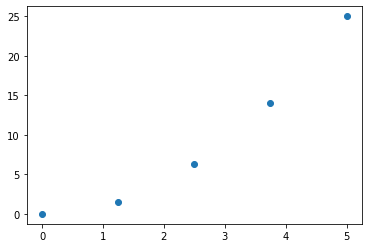

In [3]:
plt.scatter(x_data,y_data)
plt.show()

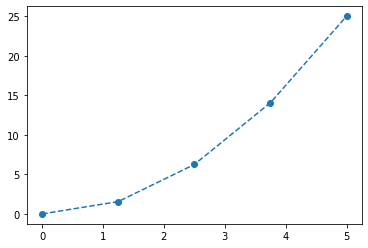

In [4]:
plt.plot(x_data,y_data,'o--')
plt.show()

This form of interpolation is linear interpolation. For any  value, one simply moves upward from the  axis to obtain the corresponding  value. We can obtain a function as follows. Note that _f in my code represents a function

In [7]:
y_f= interp1d(x_data,y_data,'linear')
y_f(1.5)

array(2.5)

Obtain y values for many many x  values

In [8]:
x = np.linspace(0,5,100)
y = y_f(x)

new plot

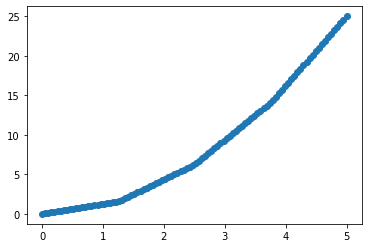

In [9]:
plt.scatter(x,y)
plt.show()

In [10]:
y_f = interp1d(x_data,y_data,'cubic')
x= np.linspace(0,5,100)
y= y_f(x)


new plot(cubic interpolation)

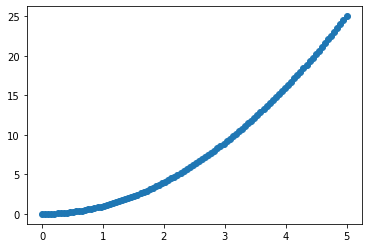

In [11]:
plt.scatter(x,y)
plt.show()

# Usefulness

So when exactly is this useful? In some situations, a functional form is preferred/required:

computing integrals (preferred)
differential equations (required)
many many other applications...
Example: Computing integral. Given a distribution of energies in a beam of photons, compute the mean energy.

In [14]:
E_data = np.array([ 0.1  ,  0.2  ,  0.3  ,  0.4  ,  0.5  ,  0.55 ,  0.662,  0.8  ,
        1.   ,  1.25 ,  1.5  ,  2.   ,  3.   ,  4.   ,  5.   ,  6.   ,
        8.   , 10.   ])

S_data = np.array([0.   , 0.032, 0.06 , 0.086, 0.109, 0.131, 0.151, 0.185, 0.212,
       0.238, 0.257, 0.274, 0.256, 0.205, 0.147, 0.096, 0.029, 0.002])


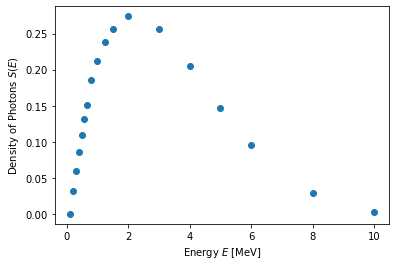

In [15]:

plt.scatter(E_data, S_data)
plt.xlabel('Energy $E$ [MeV]')
plt.ylabel('Density of Photons $S(E)$')
plt.show()


In [16]:
S_f = interp1d(E_data, S_data, 'cubic')  

numerator = quad(lambda E: E*S_f(E), min(E_data), max(E_data))[0]
denominator = quad(lambda E: S_f(E), min(E_data), max(E_data))[0]
E_mean = numerator/denominator   

E_mean


3.3825472782623396